# 분류의 성능 평가 지표

- 분류의 성능 평가지표
 - 정확도 (Accuracy), 오차행렬 (Confusion Matrix), 정밀도(Precision), 재현율(Recall), F1 스코어, ROC AUC<br><br>
  
- 분류는 결정 클래스 값 종류의 유형에 따라 긍정/부정과 같은 2개의 결괏값만을 가지는 **이진 분류**와 여러 개의 결정 클래스 값을 가지는 **멀티 분류**로 나뉠 수 있다.<br><br>

- 위에서 언급한 분류의 성능 지표는 이진/멀티 분류에 모두 적용되는 지표이지만, 특히 이진 분류에서 더욱 중요하게 강조하는 지표

## 정확도 (Accuracy)

- 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표<br><br>
<h2> $ 정확도(Accuracy) = \frac{예측결과가 동일한 데이터 건수}{전체 예측 데이터 건수} $ </h2>
<br>
- 모델 예측 성능을 나타내는 지표

#### sklearn의 BaseEstimator클래스를 상속받아 아무런 학습 하지 않고, 성별에 따라 생존자를 예측하는 단순한 Dummy Classifier 생성

In [1]:
from sklearn.base import BaseEstimator
import numpy as np
class MyDummyClassifier(BaseEstimator):
    # 아무것도 학습 X
    def fit(self, X, y=None):
        pass
    
    # predict() 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측.
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
                
        return pred

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


titanic_df = pd.read_csv('../datasets/titanic_train.csv')

y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis = 1)

X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                   test_size = 0.2, random_state = 0)

# class MyDummyClassifier 이용
Dummy_clf = MyDummyClassifier()
Dummy_clf.fit(X_train, y_train)

dummy_pred = Dummy_clf.predict(X_test)

print("Dummy Classifier의 정확도는 {0:.4f}".format(accuracy_score(y_test, dummy_pred)))

Dummy Classifier의 정확도는 0.7877


- 위에같이 단순 알고리즘으로 예측하더라도 정확도 결과는 약 78.77%다.<br><br>

- ex) 100개 데이터 중 90개가 0, 10개가 1이면, 무조건 0으로 예측 결과를 반환하는 ML모델의 경우 정확도 90%를 나타내는 불균형한 데이터세트에 따른 않좋은 예이다.

#### 불균형한 데이터 셋 만들어 확인

In [4]:

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    
    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self,X):
        return np.zeros( (len(X), 1) , dtype=bool)

# 사이킷런의 내장 데이터 셋인 load_digits( )를 이용하여 MNIST 데이터 로딩
digits = load_digits()

print(digits.data)
print("### digits.data.shape:", digits.data.shape)
print(digits.target)
print("### digits.target.shape:", digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape: (1797,)


In [5]:
digits.target == 7
# 7만 True 나머진 False 이러면 0이든 1이든 2든 전부 합쳐져서 90퍼가됨

array([False, False, False, ..., False, False, False])

In [6]:
# digits번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환. 
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=11)

In [7]:
# 불균형한 레이블 데이터 분포도 확인. 
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0 과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train , y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test , fakepred)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0 과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


- 위에처럼 7 빼곤 나머지는 True값으로 한후 예측한것은 제대로된 ML이 아님.<br><br>

- 즉, 불균형한 레이블 데이터 세트에서는 성능 수치로 사용하면 **X**!<br><br>

- 정확도가 가지는 이러한 한계점을 극복하기 위해 여러가지 분류 지표와 함께 사용

## 오차행렬(Confusion matrix)

- 학습된 분류모델이 예측을 하면서 얼마나 헷갈리고(confused)있는지도 함께 보여주는 지표

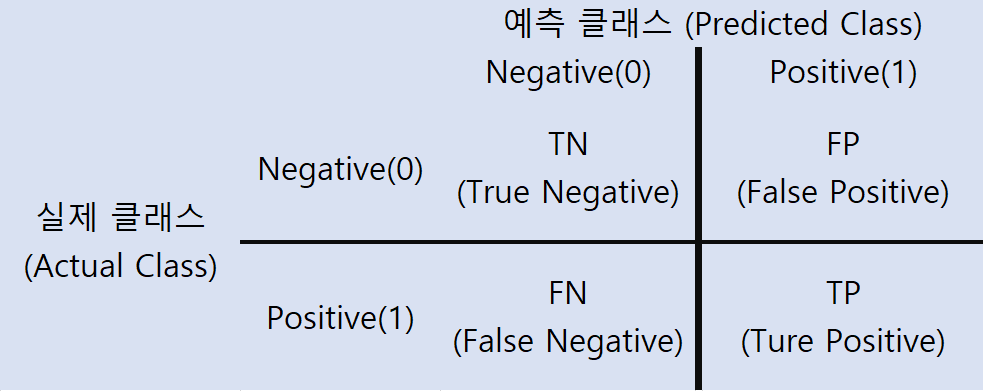

- TN는 pred : 0, real : 0
- FN는 pred : 0, real : 1
- FP는 pred : 1, real : 0
- TP는 pred : 1, real : 1

- 모듈

    from sklearn.metrics import confusion_matrix

#### 위의 결과를 오차행렬로 확인

In [8]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

- 위처럼 예측 0인 값에만 분포하고 있는 것을 확인 가능

- 오차행렬을 조합해 Classifier의 성능을 측정할 수 있는 주요 지표인 정확도(Accuracy), 정밀도(Precision), 재현율(Recall)값을 알수있다.

- 오차행렬로 정의한 정확도<br><br>
<h2>$ 정확도 = \frac{예측 결과와 실제 값이 동일한 건수}{전체 데이터 수} = \frac{(TN + TP)}{TN + FP + FN + TP} $</h2>

## 정밀도와 재현율

<h2>$ 정밀도 = \frac{TP}{(FP + TP)} $</h2>

<h2>$ 재현율 = \frac{TP}{(FN + TP)} $</h2>

- 재현율이 중요지표인 경우는 실제 Positive 양성데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우<br><br>

- ex) 실제 Positive 양성인 암환자를 Positive양성이 아닌 Negative 음성으로 판단 할경우<br><br>

- 보통 재현율이 정밀도보다 상대적으로 중요한 업무 많음

- But! 정밀도가 중요한 업무도 있음<br><br>

- **실제 Negative**음성인 데이터 **예측**을 Positive양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우<br><br>

- Ex) 스팸메일 여부를 판단하는 모델의 경우<br><br>

- 즉 재현율과 정밀도 모두 높은 수치를 얻는 것이 바람직한 평가 지표

- 정밀도 모듈

  from sklearn.metrics import precision_score

- 재현율 모듈

  from sklearn.metrics import recall_score

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    print("오차행렬")
    print(confusion)
    print('정확도(Accuracy): {0:.4f}, 정밀도(Precision): {1:.4f}, 재현율(recall): {2:.4f}'.format(accuracy , precision ,recall))

### 로지스틱 회귀 기반 타이타닉 생존자 예측

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('../datasets/titanic_train.csv')

X_titanic_df = titanic_df.drop('Survived', axis = 1)
y_titanic_df = titanic_df['Survived']

X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size = 0.2, random_state = 11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)

pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬
[[104  14]
 [ 13  48]]
정확도(Accuracy): 0.8492, 정밀도(Precision): 0.7742, 재현율(recall): 0.7869


C:\Python\machine_learning\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 정밀도 / 재현율 트레이드 오프(Trade-off)

- 정밀도와 재현율이 특별히 강조돼야 할 경우 분류의 결정 임곗값(Threshold)을 조절해 정밀도 또는 재현율의 수치 높일 수 있다.<br><br>

- 하지만 정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉽다.<br><br>

- 이를 정밀도 / 재현율 트레이드 오프(Trade-off)라 한다. 

In [12]:
# 개별 데이터 별로 예측확률을 반환하는 메서드인 predict_proba()를 제공(예측 확률 결과)
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)

print(f"pred_proba()의 shape : {pred_proba.shape}")
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])

pred_proba()의 shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.46175211 0.53824789]
 [0.87863924 0.12136076]
 [0.87717092 0.12282908]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46175211 0.53824789 1.        ]
 [0.87863924 0.12136076 0.        ]
 [0.87717092 0.12282908 0.        ]]


#### Binarizer (basic)

In [13]:
from sklearn.preprocessing import Binarizer

X = [[ 1, -1,  2],
     [ 2,  0,  0],
     [ 0,  1.1, 1.2]]

# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)                     
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


#### Binarizer (Example)

In [14]:
from sklearn.preprocessing import Binarizer

# 임계값 설정
threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = threshold).fit(pred_proba_1)
pred = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, pred)

오차행렬
[[104  14]
 [ 13  48]]
정확도(Accuracy): 0.8492, 정밀도(Precision): 0.7742, 재현율(recall): 0.7869


In [15]:
# 임계값을 0.5에서 0.4로 낮춤
threshold = 0.4

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = threshold).fit(pred_proba_1)
pred = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, pred)

오차행렬
[[98 20]
 [10 51]]
정확도(Accuracy): 0.8324, 정밀도(Precision): 0.7183, 재현율(recall): 0.8361


- 임계값을 낮추니 재현율 값이 올라가고 정밀도가 떨어짐

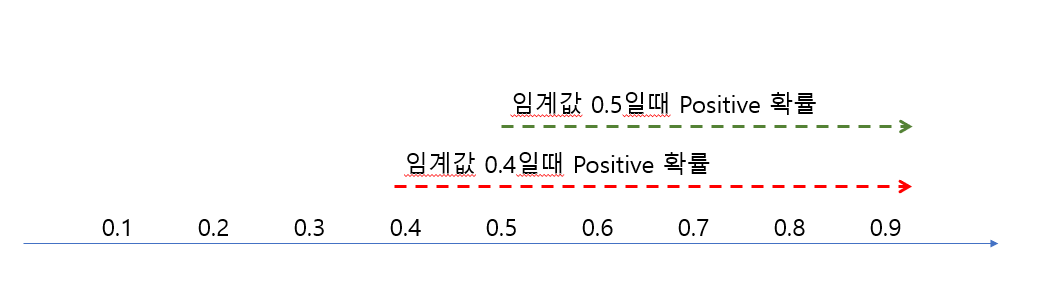

- 위의 그림처럼 Positive 예측값이 많아지면 상대적으로 재현율 값 높아짐. 양성 예측을 많이 하다 보니 실제 양성을 음성으로 예측하는 횟수가 상대적으로 줄어들기 때문

#### 여러개의 분류 결정 임곗값을 변경하면서 Binarizer를 이용하여 예측값 변환

In [16]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.4
오차행렬
[[98 20]
 [10 51]]
정확도(Accuracy): 0.8324, 정밀도(Precision): 0.7183, 재현율(recall): 0.8361
임곗값: 0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도(Accuracy): 0.8492, 정밀도(Precision): 0.7656, 재현율(recall): 0.8033
임곗값: 0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도(Accuracy): 0.8492, 정밀도(Precision): 0.7742, 재현율(recall): 0.7869
임곗값: 0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도(Accuracy): 0.8659, 정밀도(Precision): 0.8364, 재현율(recall): 0.7541
임곗값: 0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도(Accuracy): 0.8771, 정밀도(Precision): 0.8824, 재현율(recall): 0.7377


- 위의 결과에선 임곗값 0.5가 가장 정밀도와 재현율 차이가 없음

#### precision_recall_curve( ) 를 이용하여 임곗값에 따른 정밀도-재현율 값 추출

In [17]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

print("thresholds 5 sample:", thresholds[:5])
print("precisions 5 sample:", precisions[:5])
print("recalls 5 sample:", recalls[:5])

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (143,)
반환된 precisions 배열의 Shape: (144,)
반환된 recalls 배열의 Shape: (144,)
thresholds 5 sample: [0.10394781 0.10395007 0.10397544 0.10773598 0.10892335]
precisions 5 sample: [0.38853503 0.38461538 0.38709677 0.38961039 0.38562092]
recalls 5 sample: [1.         0.98360656 0.98360656 0.98360656 0.96721311]
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값:  [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임계값별 정밀도:  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


#### precision_recall_curve( )로 나타낸 값 시각화

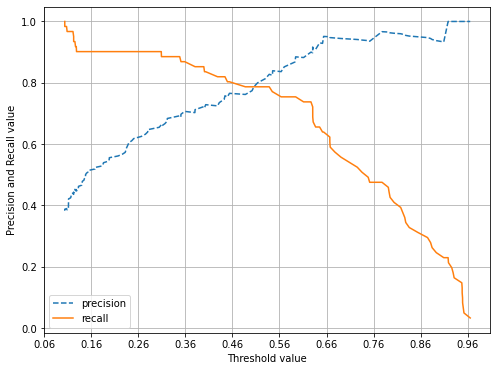

In [18]:

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

- 임곗값이 약 0.5인 지점에서 재현율과 정밀도가 비슷해짐

- 정밀도가 100%가 되는법

정밀도 = TP / (TP + FP) 이다. 전체 환자 1000명 중 확실한 Positive 징후만 가진 환자는 단 1명이라고 하면 이 한명만 Positive라 예측하고 나머지는 Negative라 예측시 FP는 0, TP는 1이되므로 정밀도는 1/(1 + 0)으로 100%

- 재현율이 100%가 되는법

전체 환자 1000명을 Positive예측. 이 중 실제 양성인 사람이 30명 정도라도 TN이 수치에 포함 X, FN은 0이므로 30 / (30 + 0)으로 100%

## F1 스코어

- 정밀도와 재현율을 결합한 지표. F1스코어는 정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은값 가짐

<h2>$ F1 = \frac{2}{\frac{1}{recall} + \frac{1}{precision}} = 2 * \frac{precision * recall}{precision + recall} 2 * \frac{정밀도 * 재현율}{정밀도 + 재현율}$</h2>

- 모듈

    from sklearn.metrics import f1_score 

In [19]:
from sklearn.metrics import f1_score 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('../datasets/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

f1 = f1_score(y_test , pred)
print('F1 스코어: {0:.4f}'.format(f1))

오차행렬
[[104  14]
 [ 13  48]]
정확도(Accuracy): 0.8492, 정밀도(Precision): 0.7742, 재현율(recall): 0.7869
F1 스코어: 0.7805


C:\Python\machine_learning\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,f1_score
import numpy as np

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    # f1 score 추가
    f1score = f1_score(y_test, pred)
    
    
    print("오차행렬")
    print(confusion)
    print('정확도(Accuracy): {0:.4f}, 정밀도(precision): {1:.4f}, 재현율(recall): {2:.4f}, F1(F1_score):{3:.4f}'.format(accuracy, precision, recall, f1score))
    

In [23]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차행렬
[[98 20]
 [10 51]]
정확도(Accuracy): 0.8324, 정밀도(precision): 0.7183, 재현율(recall): 0.8361, F1(F1_score):0.7727
임곗값: 0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도(Accuracy): 0.8492, 정밀도(precision): 0.7656, 재현율(recall): 0.8033, F1(F1_score):0.7840
임곗값: 0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도(Accuracy): 0.8492, 정밀도(precision): 0.7742, 재현율(recall): 0.7869, F1(F1_score):0.7805
임곗값: 0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도(Accuracy): 0.8659, 정밀도(precision): 0.8364, 재현율(recall): 0.7541, F1(F1_score):0.7931
임곗값: 0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도(Accuracy): 0.8771, 정밀도(precision): 0.8824, 재현율(recall): 0.7377, F1(F1_score):0.8036


## ROC 곡선과 AUC

- ROC 곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표<br><br>

- ROC 곡선은 FPR(False Positive Rate)가 변할 때 TPR(True Positive Rate)가 어떻게 변하는지 나타내는 곡선<br><br>

- TPR은 재현율을 나타낸다. 재현율은 = 민감도<br><br>

- 민감도에 대응하는 지표로는 TNR이라 불리는 특이성(Specificity)이 있다.

- TNR = TN / ( FP + TN )<br><br>

- FPR = FP / ( FP + TN )

- 모듈

    from sklearn.metrics import roc_curve

In [26]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 Step으로 추출. 
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임곗값:  [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임곗값별 FPR:  [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임곗값별 TPR:  [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


In [27]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 
print('max predict_proba:', np.max(pred_proba_class1))

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
print('thresholds[0]:', thresholds[0])
# 반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

max predict_proba: 0.9650902019156496
thresholds[0]: 1.9650902019156495
샘플 추출을 위한 임곗값 배열의 index 10개: [ 0  5 10 15 20 25 30 35 40 45 50]
샘플용 10개의 임곗값:  [1.97 0.75 0.63 0.59 0.49 0.4  0.35 0.23 0.13 0.12 0.11]
샘플 임곗값별 FPR:  [0.    0.017 0.034 0.051 0.127 0.161 0.203 0.331 0.585 0.636 0.797]
샘플 임곗값별 TPR:  [0.    0.475 0.689 0.754 0.787 0.836 0.869 0.902 0.918 0.967 0.967]


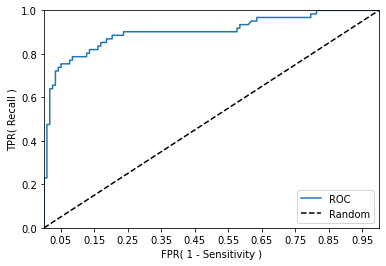

In [28]:

def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [29]:
from sklearn.metrics import roc_auc_score

#pred = lr_clf.predict(X_test)
#roc_score = roc_auc_score(y_test, pred)

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.9024


- 타이타닉 생존자 예측 로지스틱 회귀 모델의 ROC AUC값은 약 0.9024로 측정됨

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,f1_score
import numpy as np

def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    # f1 score 추가
    f1score = f1_score(y_test, pred)
    
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print("오차행렬")
    print(confusion)
    print('정확도(Accuracy): {0:.4f}, 정밀도(precision): {1:.4f}, 재현율(recall): {2:.4f}, F1(F1_score):{3:.4f}, ROC-AUC: {4:.4f}'.format(
        accuracy, precision, recall, f1score, roc_auc))
    